# Zindi Mobile Money and Financial Inclusion in Tanzania challenge
The train dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge. More about the Finscope survey here.

Each individual is classified into four mutually exclusive categories:

- No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
- Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
- Mm_only: Individuals who use mobile money only
- Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance) Financial Access Map

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!{sys.executable} -m pip install folium --user
import folium
from folium.plugins import MarkerCluster

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


## Instruction 1
1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [2]:
# Reading in the data
mob_money = pd.read_csv("training.csv")

# changing index cols with rename() 
#mob_money.rename(index = {"0": "None", "1":"Other_Only", "2":"MM_Only", "3":"MM_Plus"}, inplace = True) 
# display 
mob_money.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
# changing cols with rename()mob_money 
m_money = mob_money.rename(columns = {"Q1": "Age", 
                                  "Q2": "Gender", 
                                  "Q3": "Marital Status",
                                  "Q4": "Highest Qualification",
                                  "Q5": "Living Conditions",
                                  "Q6": "Land Ownership",
                                  "Q7": "Cellphone Ownership",
                                  "Q8_1": "Salaries/Wages",
                                  "Q8_2": "Trading",
                                  "Q8_3": "Service Provider",
                                  "Q8_4": "Piece Jobs",
                                  "Q8_5": "Rental Income",
                                  "Q8_6": "Investments",
                                  "Q8_7": "Pension",
                                  "Q8_8": "Social Welfare",
                                  "Q8_9": "Rely on Someone Else",
                                  "Q8_10": "No Money",
                                  "Q8_11": "Other",
                                  "Q9": "Employer",
                                  "Q10": "Trading Products",
                                  "Q11": "Services Provided",
                                  "Q12": "Sent Money(12months)",
                                  "Q13": "Last Sent Money",
                                  "Q14": "Received Money(12months)",
                                  "Q15": "Last Received Money",
                                  "Q16": "Mobile Money for GnS (12months)",
                                  "Q17": "Mobile Money for Bills (12months)",
                                  "Q18": "Literacy in Kiswhahili",
                                  "Q19": "Literacy in English"}) 
  
# changing columns using .columns() 
mob_money.columns = ["ID","Age", "Gender","Marital Status","Highest Qualification","Living Conditions",
                    "Land Ownership", "Cellphone Ownership", "Salaries/Wages","Trading", "Service Provider",
                    "Piece Jobs", "Rental Income","Investments", "Pension","Social Welfare",
                    "Rely on Someone Else", "No Money","Other","Employer","Trading Products",
                    "Services Provided","Sent Money(12months)","Last Sent Money","Received Money(12months)",
                    "Last Received Money","Mobile Money for GnS (12months)", "Mobile Money for Bills (12months)",
                    "Literacy in Kiswhahili","Literacy in English","Latitude","Longitude","mobile_money","savings",
                    "borrowing","insurance","mobile_money_classification"] 
  
# dropna used to ignore na values 
#print(new_data.dropna()== data.dropna()) 

In [4]:
mob_money.head()

,ID,Age,Gender,Marital Status,Highest Qualification,Living Conditions,Land Ownership,Cellphone Ownership,Salaries/Wages,Trading,...,Mobile Money for Bills (12months),Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [5]:
# list comprehension
print(mob_money['Gender'].unique())
mob_money['Gender']= ['Female' if each==2 else 'Male' for each in mob_money['Gender']]

[2 1]


In [6]:
# list comprehension
print(mob_money['Land Ownership'].unique())
mob_money['Land Ownership']= ['No' if each==2 else 'Yes' for each in mob_money['Land Ownership']]

[2 1]


In [7]:
print(mob_money['Sent Money(12months)'].unique())
mob_money['Sent Money(12months)']= ['No' if each==2 else 'Yes' for each in mob_money['Sent Money(12months)']]

[2 1]


In [8]:
print(mob_money['Received Money(12months)'].unique())
mob_money['Received Money(12months)']= ['No' if each==2 else 'Yes' for each in mob_money['Received Money(12months)']]

[2 1]


In [9]:
print(mob_money['Last Sent Money'].unique())
mob_money['Last Sent Money'] = mob_money['Last Sent Money'].map({-1: "N/A", 4: "90Days", 2: "7Days", 5: "90+Days", 3: "30Days", 6: "6Mnth+", 1: "Y/Today"})
#mob_money.head()

[-1  4  2  5  3  6  1]


In [10]:
print(mob_money['Last Received Money'].unique())
mob_money['Last Received Money'] = mob_money['Last Received Money'].map({-1: "N/A", 5: "90+Days", 1: "Y/Today", 3: "30Days", 4: "90Days", 6: "6Mnth+", 2: "7Days"})
#mob_money.head()

[-1  5  1  3  4  6  2]


In [11]:
print(mob_money['Mobile Money for GnS (12months)'].unique())
mob_money['Mobile Money for GnS (12months)'] = mob_money['Mobile Money for GnS (12months)'].map({-1: "N/A", 1: "Never", 4: "Monthly", 5: "LessMnthly", 3: "Weekly", 2: "Daily"})
#mob_money.head()

[1 4 5 3 2]


In [12]:
print(mob_money['Mobile Money for Bills (12months)'].unique())
mob_money['Mobile Money for Bills (12months)'] = mob_money['Mobile Money for Bills (12months)'].map({-1: "N/A", 4: "Monthly", 1: "Never", 2: "Daily", 5: "LessMnthly", 3: "Weekly"})
#mob_money.head()

[-1  4  1  2  5  3]


In [13]:
print(mob_money['mobile_money'].unique())
mob_money['mobile_money']= ['No' if each==0 else 'Yes' for each in mob_money['mobile_money']]

[0 1]


In [14]:
mob_money.columns

Index(['ID', 'Age', 'Gender', 'Marital Status', 'Highest Qualification',
       'Living Conditions', 'Land Ownership', 'Cellphone Ownership',
       'Salaries/Wages', 'Trading', 'Service Provider', 'Piece Jobs',
       'Rental Income', 'Investments', 'Pension', 'Social Welfare',
       'Rely on Someone Else', 'No Money', 'Other', 'Employer',
       'Trading Products', 'Services Provided', 'Sent Money(12months)',
       'Last Sent Money', 'Received Money(12months)', 'Last Received Money',
       'Mobile Money for GnS (12months)', 'Mobile Money for Bills (12months)',
       'Literacy in Kiswhahili', 'Literacy in English', 'Latitude',
       'Longitude', 'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification'],
      dtype='object')

In [15]:
incomes = mob_money.loc[:, 'Salaries/Wages':'Other']
incomes['mobile_money'] = mob_money['mobile_money']
incomes['Sent Money(12months)'] = mob_money['Sent Money(12months)']
incomes['Received Money(12months)'] = mob_money['Received Money(12months)']
incomes = pd.melt(incomes, id_vars = ['mobile_money', 'Sent Money(12months)', 'Received Money(12months)'], var_name='Income_Type') 
incomes = incomes[incomes['value'] == 1]
incomes.Income_Type.value_counts()
incomes.head()

,mobile_money,Sent Money(12months),Received Money(12months),Income_Type,value
1,Yes,Yes,Yes,Salaries/Wages,1
27,Yes,Yes,Yes,Salaries/Wages,1
45,Yes,No,No,Salaries/Wages,1
47,Yes,Yes,No,Salaries/Wages,1
62,Yes,No,No,Salaries/Wages,1


In [16]:
incomes.head()

,mobile_money,Sent Money(12months),Received Money(12months),Income_Type,value
1,Yes,Yes,Yes,Salaries/Wages,1
27,Yes,Yes,Yes,Salaries/Wages,1
45,Yes,No,No,Salaries/Wages,1
47,Yes,Yes,No,Salaries/Wages,1
62,Yes,No,No,Salaries/Wages,1


In [17]:
print(mob_money['mobile_money_classification'].unique())
mob_money['mobile_money_classification'] = mob_money['mobile_money_classification'].map({0: "None", 3: "MM_Plus", 2: "MM_Only", 1: "Other_Only"})
mob_money.head()

[0 3 2 1]


,ID,Age,Gender,Marital Status,Highest Qualification,Living Conditions,Land Ownership,Cellphone Ownership,Salaries/Wages,Trading,...,Mobile Money for Bills (12months),Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,Female,3,1,1,No,2,0,0,...,N/A,4,4,-4.460442,29.811396,No,0,0,0,None
1,1258,40,Male,1,3,5,Yes,1,1,0,...,Monthly,1,4,-6.176438,39.244871,Yes,1,1,0,MM_Plus
2,331,18,Female,4,6,3,No,1,0,0,...,N/A,1,1,-6.825702,37.652798,Yes,0,0,0,MM_Only
3,6729,50,Male,1,3,1,Yes,1,0,0,...,N/A,1,4,-3.372049,35.808307,Yes,0,1,0,MM_Plus
4,8671,34,Male,1,1,1,No,1,0,1,...,N/A,1,4,-7.179645,31.039095,Yes,1,0,1,MM_Plus


In [18]:
print(mob_money['Marital Status'].unique())
mob_money['Marital Status'] = mob_money['Marital Status'].map({3: "Widowed", 1: "Married", 4: "Single", 2: "Divorced"})
mob_money.head()

[3 1 4 2]


,ID,Age,Gender,Marital Status,Highest Qualification,Living Conditions,Land Ownership,Cellphone Ownership,Salaries/Wages,Trading,...,Mobile Money for Bills (12months),Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,Female,Widowed,1,1,No,2,0,0,...,N/A,4,4,-4.460442,29.811396,No,0,0,0,None
1,1258,40,Male,Married,3,5,Yes,1,1,0,...,Monthly,1,4,-6.176438,39.244871,Yes,1,1,0,MM_Plus
2,331,18,Female,Single,6,3,No,1,0,0,...,N/A,1,1,-6.825702,37.652798,Yes,0,0,0,MM_Only
3,6729,50,Male,Married,3,1,Yes,1,0,0,...,N/A,1,4,-3.372049,35.808307,Yes,0,1,0,MM_Plus
4,8671,34,Male,Married,1,1,No,1,0,1,...,N/A,1,4,-7.179645,31.039095,Yes,1,0,1,MM_Plus


## Instruction 2
2. Get basic descriptive statistics for the dataset.

In [19]:
mob_money.describe()

,ID,Age,Highest Qualification,Living Conditions,Cellphone Ownership,Salaries/Wages,Trading,Service Provider,Piece Jobs,Rental Income,...,Employer,Trading Products,Services Provided,Literacy in Kiswhahili,Literacy in English,Latitude,Longitude,savings,borrowing,insurance
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,3.060051,2.548915,1.397942,0.062165,0.630110,0.058077,0.337327,0.009445,...,-0.794615,0.876092,-0.692134,1.860164,3.163378,-6.034378,35.354029,0.461517,0.432901,0.151255
std,2731.120086,16.332148,1.557779,1.534257,0.489508,0.241472,0.482809,0.233906,0.472831,0.096730,...,0.895007,2.172787,1.411600,1.351372,1.317691,2.720888,2.899511,0.498552,0.495512,0.358322
min,1.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000
50%,4744.500000,35.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,-1.000000,1.000000,4.000000,-6.087854,35.073326,0.000000,0.000000,0.000000
75%,7105.000000,48.000000,3.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,-1.000000,1.000000,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,0.000000
max,9459.000000,100.000000,8.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,10.000000,12.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000


## Instruction 3
3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

### Financial Services Accessed vs Age 

Text(0.5, 1, "Financial Services Accessed With Respect to User's Age")

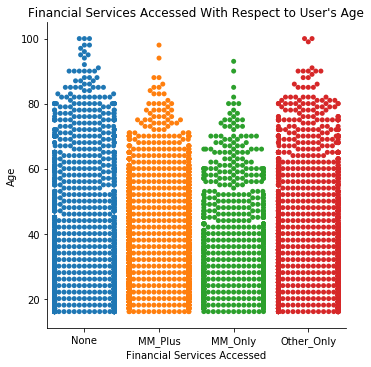

In [20]:
g = sns.catplot(x = 'mobile_money_classification', y = 'Age', kind = "swarm", data = mob_money)
plt.xlabel('Financial Services Accessed')
plt.ylabel('Age')
plt.title("Financial Services Accessed With Respect to User's Age")

The oldest people (80years+) are mostly observed in the "None" part of the financial service classification. The younger people are in the "MM_Only" part and the other parts as well. It seems like not too many older people can access financial services easily, it's mainly people of ages younger than 60 that seem to have access to financial services. We need to explore the data further to see what influences the accessibility financial services in Tanzania.

### Financial Services Accessed vs Gender

Text(24.84213541666667, 0.5, 'Number of People')

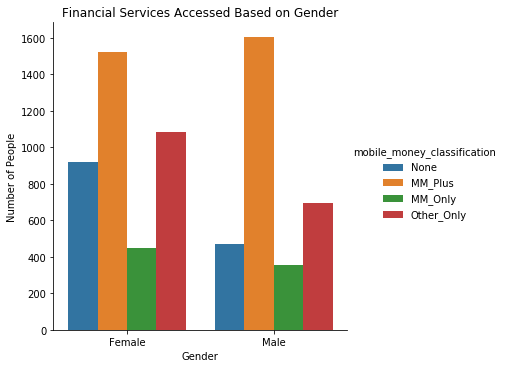

In [21]:
g = sns.catplot(x = "Gender", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')

There seems to be generally more females than males who use mobile money, as well as other forms of money circulation methods. This could be due to the fact that many women have to take care of family and make sure money circulates to their children, and possibly extended family. The majority of men seem to use other forms of money circulation methods except mobile money, which begs the question of whether or not men are equipped with the knowledge and ability of technical services of money.

### Financial Services Accessed vs Marital Status 

Text(24.894522569444447, 0.5, 'Number of People')

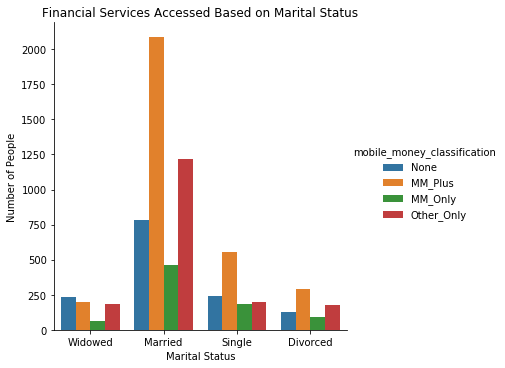

In [22]:
g = sns.catplot(x = "Marital Status", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')

When we look at the x-axis, we can see how the number of people who use mobile money only are divorced, followed by those who are married. Going back to the other two aspects we previously observed, i.e. Age and Gender, we noticed how most mobile money users are in their mid-to-late thirties, and we also noticed how most of them are female. Now we are seeing that most of them are either divorced or married. This can just simply bring about the conclusion that as women get older, they are faced with many responsibilities, not only of money flow in the family, but as well as taking care of certain needs in the family, which makes sense for most of them to opt into using mobile money, as a form of bringing about some sense of ease with all the amount of responsibilities that need to be taken care of.

### Financial Services Accessed vs Land Ownership

Text(24.84213541666667, 0.5, 'Number of People')

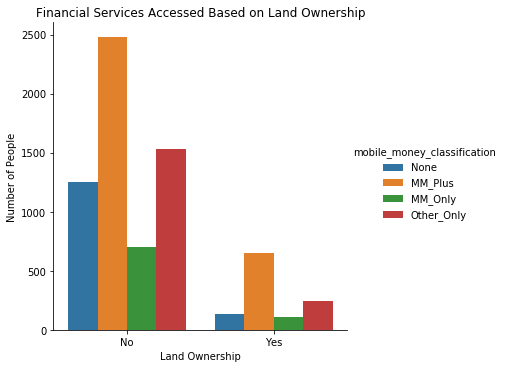

In [23]:
g = sns.catplot(x = "Land Ownership", kind = 'count', hue = "mobile_money_classification", data = mob_money)
plt.title('Financial Services Accessed Based on Land Ownership')
plt.xlabel('Land Ownership')
plt.ylabel('Number of People')

We are trying to find out whether or not people owning land affects their usage of mobile money. Most people without land ownership actually use mobile money more than those who own land. This could be due to payment of bills such as rent, water and electricity, parking, etc.

### Financial Services Accessed vs Type of Income

Text(0, 0.5, 'Type of Income')

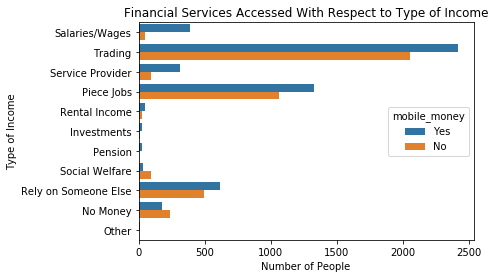

In [24]:
sns.countplot(y = incomes.Income_Type, hue = 'mobile_money', data = incomes)
plt.title('Financial Services Accessed With Respect to Type of Income')
plt.xlabel('Number of People')
plt.ylabel('Type of Income')

## Instruction 4
4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### How Often Financial Services Accessed vs Age

Text(3.799999999999997, 0.5, 'Age')

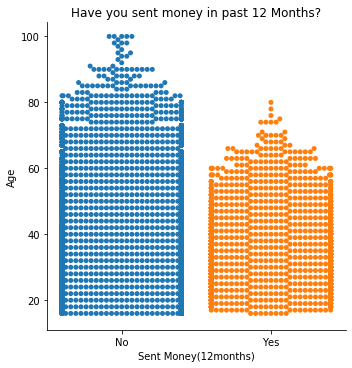

In [26]:
g = sns.catplot(x = 'Sent Money(12months)', y = 'Age', kind = "swarm", data = mob_money)
plt.title('Have you sent money in past 12 Months?')
plt.xlabel('Sent Money(12months)')
plt.ylabel('Age')

Text(3.799999999999997, 0.5, 'Age')

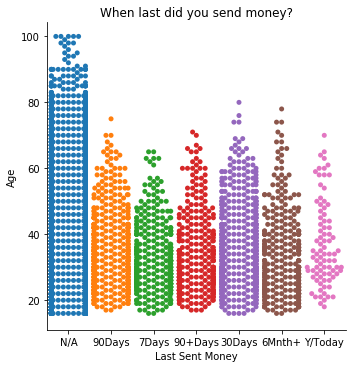

In [27]:
g = sns.catplot(x = 'Last Sent Money', y = 'Age', kind = "swarm", data = mob_money)
# plt.figure(figsize=(50,20))
plt.title('When last did you send money?')
plt.xlabel('Last Sent Money')
plt.ylabel('Age')

Text(3.799999999999997, 0.5, 'Age')

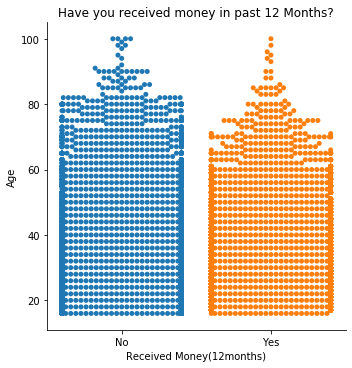

In [28]:
g = sns.catplot(x = 'Received Money(12months)', y = 'Age', kind = "swarm", data = mob_money)
plt.title('Have you received money in past 12 Months?')
plt.xlabel('Received Money(12months)')
plt.ylabel('Age')

Text(3.799999999999997, 0.5, 'Age')

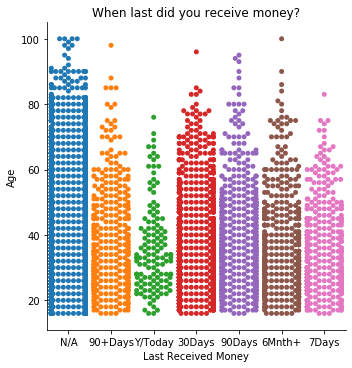

In [29]:
g = sns.catplot(x = 'Last Received Money', y = 'Age', kind = "swarm", data = mob_money)
# plt.figure(figsize=(50,20))
plt.title('When last did you receive money?')
plt.xlabel('Last Received Money')
plt.ylabel('Age')

Text(3.799999999999997, 0.5, 'Age')

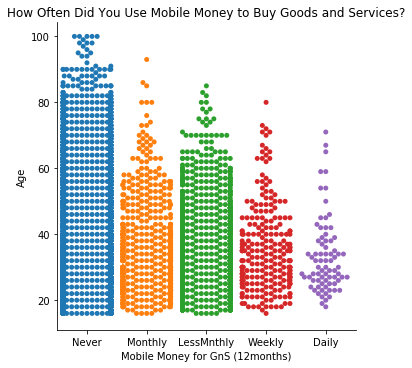

In [30]:
# "Mobile Money for Bills (12months)"
g = sns.catplot(x = 'Mobile Money for GnS (12months)', y = 'Age', kind = "swarm", data = mob_money)
# plt.figure(figsize=(50,20))
plt.title('How Often Did You Use Mobile Money to Buy Goods and Services?')
plt.xlabel('Mobile Money for GnS (12months)')
plt.ylabel('Age')

Text(3.799999999999997, 0.5, 'Age')

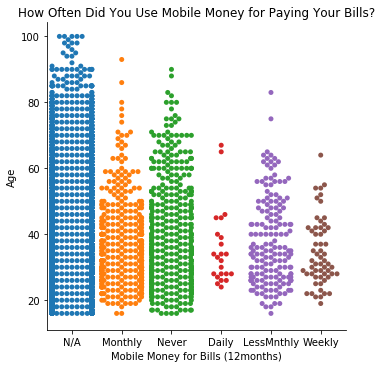

In [31]:
# "Mobile Money for Bills (12months)"
g = sns.catplot(x = 'Mobile Money for Bills (12months)', y = 'Age', kind = "swarm", data = mob_money)
# plt.figure(figsize=(50,20))
plt.title('How Often Did You Use Mobile Money for Paying Your Bills?')
plt.xlabel('Mobile Money for Bills (12months)')
plt.ylabel('Age')

### How Often Financial Services Accessed vs Gender

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


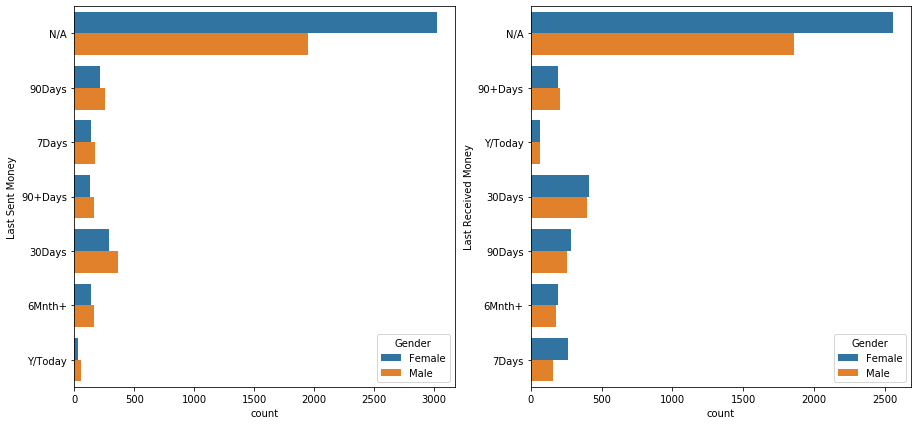

In [33]:
fig, ax =plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(y = "Last Sent Money", hue = "Gender", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Gender", data = mob_money, ax=ax[1])
fig.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


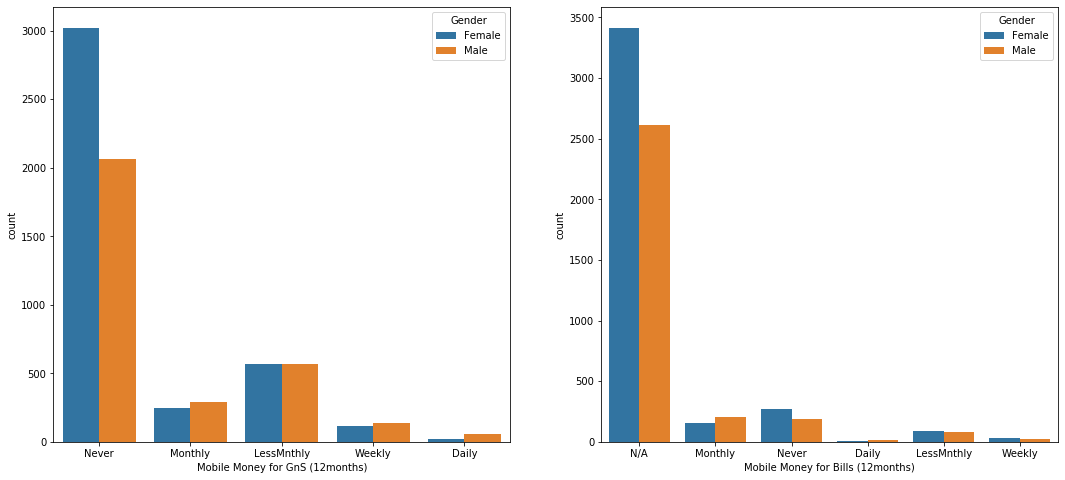

In [34]:
fig, ax =plt.subplots(1, 2, figsize = (18, 8))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Gender", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Gender", data = mob_money, ax=ax[1])
fig.show()

### How Often Financial Services Accessed vs Marital Status

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


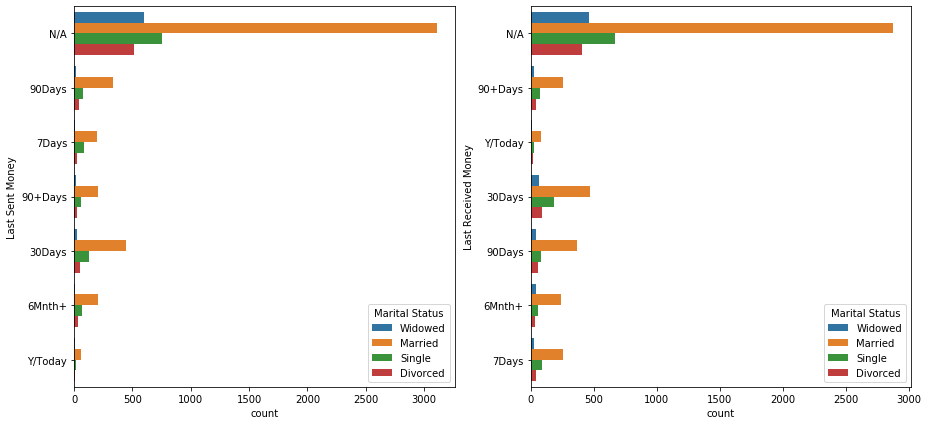

In [53]:
fig, ax =plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(y = "Last Sent Money", hue = "Marital Status", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Marital Status", data = mob_money, ax=ax[1])
fig.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


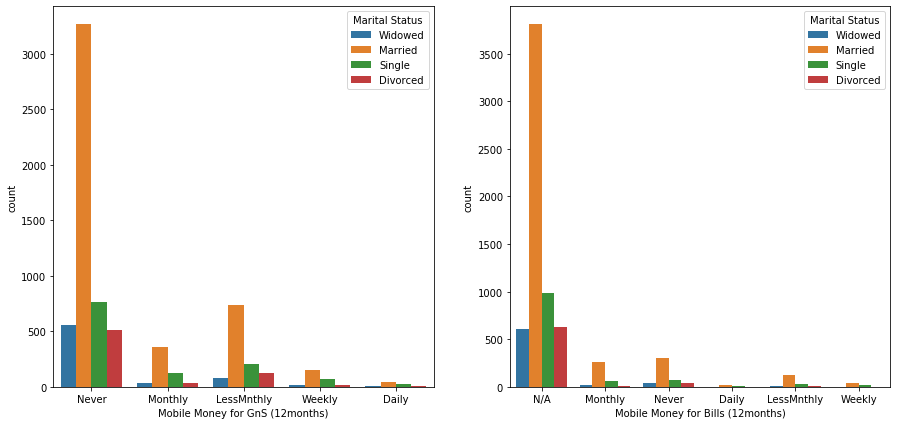

In [56]:
fig, ax =plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Marital Status", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Marital Status", data = mob_money, ax=ax[1])
fig.show()

### How Often Financial Services Accessed vs Land Ownership

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


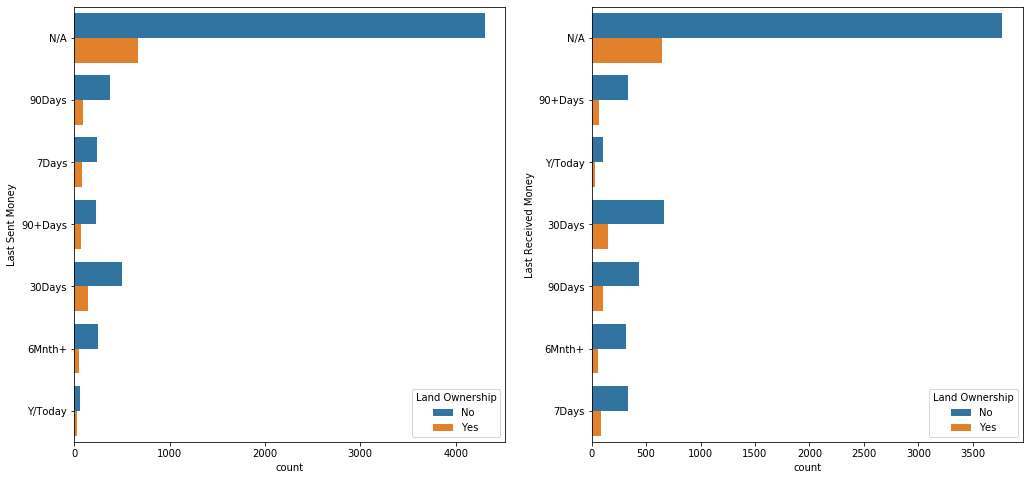

In [60]:
fig, ax =plt.subplots(1, 2, figsize = (17, 8))
sns.countplot(y = "Last Sent Money", hue = "Land Ownership", data = mob_money, ax=ax[0])
sns.countplot(y = "Last Received Money", hue = "Land Ownership", data = mob_money, ax=ax[1])
fig.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


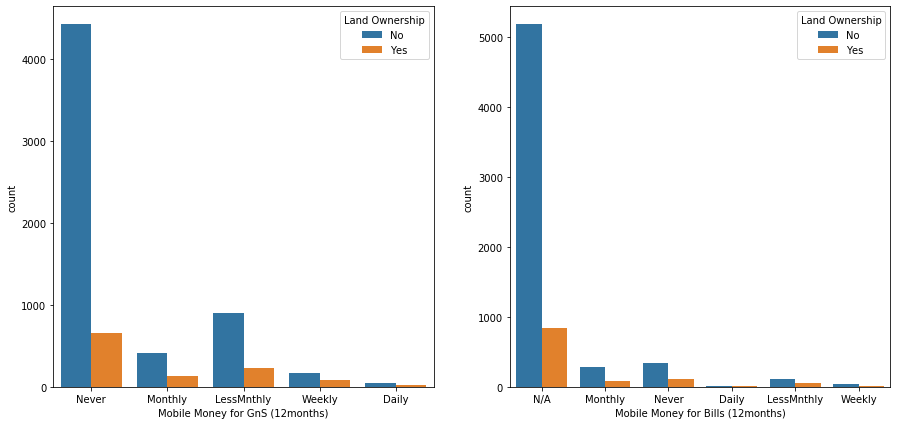

In [58]:
fig, ax =plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(x = "Mobile Money for GnS (12months)", hue = "Land Ownership", data = mob_money, ax=ax[0])
sns.countplot(x = "Mobile Money for Bills (12months)", hue = "Land Ownership", data = mob_money, ax=ax[1])
fig.show()

### How Often Financial Services Accessed vs Type of Income

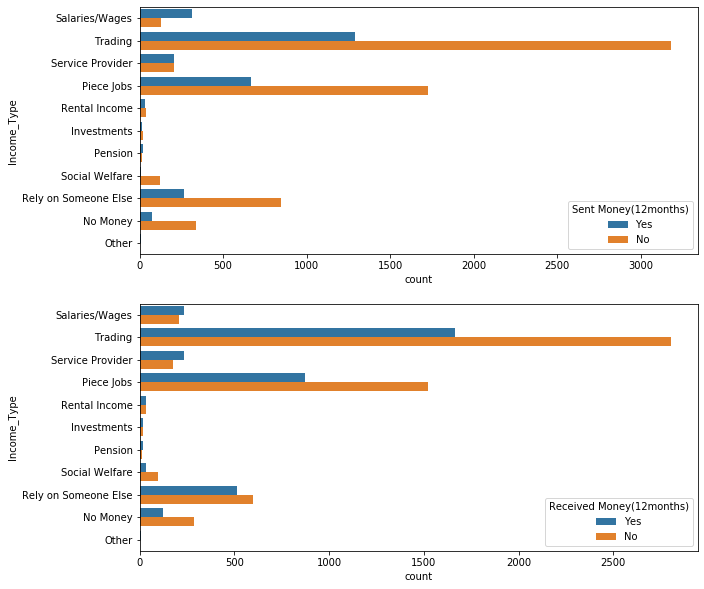

In [65]:
fig, ax =plt.subplots(2, 1, figsize = (10, 10))
sns.countplot(y = incomes.Income_Type, hue = 'Sent Money(12months)', data = incomes, ax=ax[0])
sns.countplot(y = incomes.Income_Type, hue = 'Received Money(12months)', data = incomes, ax=ax[1])

## Instruction 5
5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [49]:
income = mob_money[(mob_money["Salaries/Wages"] == 1) | (mob_money["Trading"] == 1) | (mob_money["Service Provider"] == 1) | (mob_money["Piece Jobs"] == 1) | (mob_money["Rental Income"] == 1) | (mob_money["Investments"] == 1) | (mob_money["Pension"] == 1) | (mob_money["Social Welfare"] == 1) | (mob_money["Rely on Someone Else"] == 1) | (mob_money["No Money"] == 1) | (mob_money["Other"] == 1)]
len(income)

7094

In [50]:
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(income.Latitude, income.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps